In [6]:
from rdkit import Chem


In [7]:
!pip install openpyxl

In [8]:
import pandas as pd

df = pd.read_excel (r'C:\Users\DELL\Desktop\Dissertation\Data/httpsdoi.org10.1021acsomega.0c05303.xlsx', sheet_name='S11')
print (df)

          CAS RN      CHEMBL ID  \
0     1349384231  CHEMBL1077125   
1      491583881  CHEMBL1077290   
2      390810614  CHEMBL1077321   
3     1220636009  CHEMBL1077331   
4      491584260  CHEMBL1077335   
5     1102363278  CHEMBL1077377   
6     1102363449  CHEMBL1078093   
7     1198082459  CHEMBL1078195   
8      390810181  CHEMBL1078391   
9     1220636065  CHEMBL1078392   
10    1220635971  CHEMBL1078494   
11     390810192  CHEMBL1078670   
12    1102363358  CHEMBL1079102   
13    1102362548  CHEMBL1079176   
14    1102362504  CHEMBL1079698   
15    1102363427  CHEMBL1079700   
16    1102363392  CHEMBL1079701   
17    1102362515  CHEMBL1080764   
18    1102362491  CHEMBL1080765   
19    1102363187  CHEMBL1081857   
20    1102362742  CHEMBL1081858   
21     391680812  CHEMBL1082033   
22    1348766982  CHEMBL1082853   
23    1349887860  CHEMBL1082854   
24     477931763  CHEMBL1082873   
25     477931729  CHEMBL1082874   
26     477931376  CHEMBL1083504   
27     477930964  CH

In [9]:
pd.options.display.max_rows=9999

In [11]:
%pylab inline
import pandas as pd
!pip install scikit-learn
!pip install seaborn
import sklearn
from rdkit import rdBase
import matplotlib as mpl
import numpy as np
import seaborn as sns
from rdkit.Chem import Lipinski, Descriptors
from rdkit.Chem import Descriptors
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
size = (120, 120)
import requests
import re

Populating the interactive namespace from numpy and matplotlib
     ------------------------------------ 292.8/292.8 KB 821.5 kB/s eta 0:00:00


In [12]:
df

,CAS RN,CHEMBL ID,Smiles,Binary Classification
0,1349384231,CHEMBL1077125,CC(C)CCn1c2ccc(cc2c(c(c1=O)C3=NS(=O)(=O)c4cc(c...,0
1,491583881,CHEMBL1077290,c1cc(ccc1/C=C/C(=O)O)NC(=O)C2(CCC2)NC(=O)c3ccc...,0
2,390810614,CHEMBL1077321,c1ccnc(c1)c2nc3cc(ccc3n2C4CCCCC4)C(=O)N[C@@H](...,0
3,1220636009,CHEMBL1077331,c1cc2c(cc1C(=O)c3nc4cc(ccc4n3C5CCCCC5)C(=O)N[C...,0
4,491584260,CHEMBL1077335,c1ccnc(c1)c2nc3cc(ccc3n2C4CCCCC4)C(=O)NC5(CCCC...,0
5,1102363278,CHEMBL1077377,c1cscc1c2[nH]c(c(c(=O)n2)O)C(=O)O,0
6,1102363449,CHEMBL1078093,c1ccc2cc(ccc2c1)S(=O)(=O)NC(=O)Nc3cscc3c4[nH]c...,0
7,1198082459,CHEMBL1078195,CS(=O)(=O)NC(=O)Nc1cscc1c2[nH]c(c(c(=O)n2)O)C(...,0
8,390810181,CHEMBL1078391,c1cc(sc1)c2nc3cc(ccc3n2C4CCCCC4)C(=O)N[C@@H](C...,0
9,1220636065,CHEMBL1078392,c1cc(sc1)c2nc3cc(ccc3n2C4CCCCC4)C(=O)N[C@@H](C...,0


In [13]:
new_df=df['CHEMBL ID']

In [14]:
new_df

0       CHEMBL1077125
1       CHEMBL1077290
2       CHEMBL1077321
3       CHEMBL1077331
4       CHEMBL1077335
5       CHEMBL1077377
6       CHEMBL1078093
7       CHEMBL1078195
8       CHEMBL1078391
9       CHEMBL1078392
10      CHEMBL1078494
11      CHEMBL1078670
12      CHEMBL1079102
13      CHEMBL1079176
14      CHEMBL1079698
15      CHEMBL1079700
16      CHEMBL1079701
17      CHEMBL1080764
18      CHEMBL1080765
19      CHEMBL1081857
20      CHEMBL1081858
21      CHEMBL1082033
22      CHEMBL1082853
23      CHEMBL1082854
24      CHEMBL1082873
25      CHEMBL1082874
26      CHEMBL1083504
27      CHEMBL1083505
28      CHEMBL1084405
29      CHEMBL1084406
30      CHEMBL1084407
31      CHEMBL1084408
32      CHEMBL1084662
33      CHEMBL1084672
34      CHEMBL1085186
35      CHEMBL1085435
36      CHEMBL1085436
37      CHEMBL1085440
38      CHEMBL1085677
39      CHEMBL1085891
40      CHEMBL1085893
41      CHEMBL1085894
42      CHEMBL1086643
43      CHEMBL1086833
44      CHEMBL1086917
45      CH

In [15]:
pip install chembl_webresource_client


In [16]:
from chembl_webresource_client.new_client import new_client
for i in new_df:
    molecule = new_client.molecule
    m1 = molecule.filter(chembl_id=i).only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])
m1


[{'molecule_chembl_id': 'CHEMBL84384', 'molecule_structures': {'canonical_smiles': 'COC(=O)N(CC(=O)O)C(=O)c1c(Cl)ccc2c(C(F)(F)F)c(OC)ccc12', 'molfile': '\n     RDKit          2D\n\n 28 29  0  0  0  0  0  0  0  0999 V2000\n    2.2500   -2.4917    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.9625   -2.0750    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    2.2542   -3.3167    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.5417   -3.7292    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.8292   -4.9750    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.5417   -4.5542    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.8292   -5.8000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    3.8000   -2.3750    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.9542   -1.2500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.8292   -3.3167    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.2542   -4.9667    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  

In [18]:
pd.options.display.max_rows=9999

In [17]:
def get_standard_value(chembl_id, standard_type):
    records = new_client.activity.filter(molecule_chembl_id=chembl_id).filter(standard_units='nM').filter(standard_type=standard_type)
    df = pd.DataFrame.from_dict(records)
    if len(df)>0:
        return (chembl_id,df['standard_value'][0])
    

In [19]:
x_list = list()
i=1
for chem_id in df['CHEMBL ID']:
    f=get_standard_value(chem_id,'IC50')
    if f!= None:
        x_list.append(f)
        print(x_list[-1])
        print(f"{i}/{len(df['CHEMBL ID'])}")
    i+=1
    print('----------------')

('CHEMBL1077125', '5.0')
1/2296
----------------
('CHEMBL1077290', '50.0')
2/2296
----------------
('CHEMBL1077321', '140.0')
3/2296
----------------
('CHEMBL1077331', '380.0')
4/2296
----------------
('CHEMBL1077335', '30000.0')
5/2296
----------------
('CHEMBL1077377', '6151.0')
6/2296
----------------
('CHEMBL1078093', '48.0')
7/2296
----------------
('CHEMBL1078195', '426.0')
8/2296
----------------
('CHEMBL1078391', '450.0')
9/2296
----------------
('CHEMBL1078392', '80.0')
10/2296
----------------
('CHEMBL1078494', '730.0')
11/2296
----------------
('CHEMBL1078670', '1160.0')
12/2296
----------------
('CHEMBL1079102', '8280.0')
13/2296
----------------
('CHEMBL1079176', '326.0')
14/2296
----------------
('CHEMBL1079698', '47.0')
15/2296
----------------
('CHEMBL1079700', '38.0')
16/2296
----------------
('CHEMBL1079701', '85.0')
17/2296
----------------
('CHEMBL1080764', '62.0')
18/2296
----------------
('CHEMBL1080765', '78.0')
19/2296
----------------
('CHEMBL1081857', '2610.0'

('CHEMBL1651399', '9.0')
168/2296
----------------
('CHEMBL1651400', '11.0')
169/2296
----------------
('CHEMBL1651401', '10.0')
170/2296
----------------
('CHEMBL1651402', '11.0')
171/2296
----------------
('CHEMBL1651404', '35.0')
172/2296
----------------
('CHEMBL1651406', '72.0')
173/2296
----------------
('CHEMBL165438', '4100.0')
174/2296
----------------
('CHEMBL166740', '1800.0')
175/2296
----------------
('CHEMBL167155', '1400.0')
176/2296
----------------
----------------
('CHEMBL1673155', '1800.0')
178/2296
----------------
('CHEMBL1673156', '7900.0')
179/2296
----------------
('CHEMBL1673157', '3000.0')
180/2296
----------------
('CHEMBL167521', '5000.0')
181/2296
----------------
('CHEMBL167707', '1400.0')
182/2296
----------------
('CHEMBL167790', '1000.0')
183/2296
----------------
('CHEMBL168083', '3000.0')
184/2296
----------------
('CHEMBL169278', '8.6')
185/2296
----------------
('CHEMBL172902', '1900.0')
186/2296
----------------
('CHEMBL173466', '8.0')
187/2296
---

('CHEMBL1821956', '560.0')
332/2296
----------------
('CHEMBL1821958', '25.0')
333/2296
----------------
('CHEMBL1821961', '59.0')
334/2296
----------------
('CHEMBL1821962', '32.0')
335/2296
----------------
('CHEMBL1821963', '17.0')
336/2296
----------------
('CHEMBL182203', '640.0')
337/2296
----------------
('CHEMBL182233', '2900.0')
338/2296
----------------
('CHEMBL182285', '2100.0')
339/2296
----------------
('CHEMBL182338', '1300.0')
340/2296
----------------
('CHEMBL1825211', '900.0')
341/2296
----------------
('CHEMBL1825212', '7300.0')
342/2296
----------------
('CHEMBL1825213', '1300.0')
343/2296
----------------
('CHEMBL1825214', '8100.0')
344/2296
----------------
('CHEMBL1825215', '7800.0')
345/2296
----------------
('CHEMBL1825216', '4400.0')
346/2296
----------------
('CHEMBL1825217', '2500.0')
347/2296
----------------
('CHEMBL1825220', '300.0')
348/2296
----------------
('CHEMBL1825221', '600.0')
349/2296
----------------
('CHEMBL1825223', '1300.0')
350/2296
--------

('CHEMBL201034', '3950.0')
498/2296
----------------
('CHEMBL2010806', '2300.0')
499/2296
----------------
('CHEMBL201088', '82.0')
500/2296
----------------
('CHEMBL2011001', '520.0')
501/2296
----------------
('CHEMBL2011002', '3000.0')
502/2296
----------------
('CHEMBL2011004', '5000.0')
503/2296
----------------
('CHEMBL2011009', '2200.0')
504/2296
----------------
('CHEMBL2011010', '1000.0')
505/2296
----------------
('CHEMBL2011024', '3000.0')
506/2296
----------------
('CHEMBL2011025', '7000.0')
507/2296
----------------
('CHEMBL2011026', '10000.0')
508/2296
----------------
('CHEMBL2011036', '580.0')
509/2296
----------------
('CHEMBL2011037', '2300.0')
510/2296
----------------
('CHEMBL2011039', '2000.0')
511/2296
----------------
('CHEMBL2011046', '2500.0')
512/2296
----------------
('CHEMBL2011047', '15000.0')
513/2296
----------------
('CHEMBL2011048', '5000.0')
514/2296
----------------
('CHEMBL2011049', '3900.0')
515/2296
----------------
('CHEMBL2011050', '7300.0')
516/

('CHEMBL2042715', '9.0')
656/2296
----------------
('CHEMBL2042716', '4.0')
657/2296
----------------
('CHEMBL2042717', '5.0')
658/2296
----------------
('CHEMBL2042718', '5.0')
659/2296
----------------
('CHEMBL2042990', '46.0')
660/2296
----------------
('CHEMBL2043025', '34.0')
661/2296
----------------
----------------
('CHEMBL2043027', '26.0')
663/2296
----------------
----------------
----------------
('CHEMBL2043032', '290.0')
666/2296
----------------
----------------
('CHEMBL2043034', '31.0')
668/2296
----------------
----------------
----------------
('CHEMBL2043042', '530.0')
671/2296
----------------
('CHEMBL2043043', '2420.0')
672/2296
----------------
('CHEMBL2043148', '14.0')
673/2296
----------------
('CHEMBL2043149', '14.0')
674/2296
----------------
('CHEMBL2043156', '3.0')
675/2296
----------------
('CHEMBL2043157', '6.0')
676/2296
----------------
('CHEMBL2043159', '7.0')
677/2296
----------------
('CHEMBL2043160', '5.0')
678/2296
----------------
('CHEMBL2043161', 

('CHEMBL217213', '120.0')
822/2296
----------------
('CHEMBL217214', '28.0')
823/2296
----------------
('CHEMBL217625', '340.0')
824/2296
----------------
('CHEMBL217670', '120.0')
825/2296
----------------
----------------
----------------
('CHEMBL217807', '210.0')
828/2296
----------------
----------------
----------------
----------------
----------------
----------------
----------------
----------------
----------------
----------------
----------------
----------------
----------------
----------------
----------------
----------------
----------------
----------------
----------------
----------------
----------------
----------------
----------------
('CHEMBL2181618', '6300.0')
851/2296
----------------
----------------
----------------
('CHEMBL2181621', '10700.0')
854/2296
----------------
----------------
----------------
----------------
----------------
----------------
('CHEMBL2181634', '10900.0')
860/2296
----------------
----------------
----------------
('CHEMBL2181638'

('CHEMBL2402047', '20.0')
1031/2296
----------------
('CHEMBL2402048', '180.0')
1032/2296
----------------
('CHEMBL2402049', '1040.0')
1033/2296
----------------
('CHEMBL2402050', '460.0')
1034/2296
----------------
('CHEMBL2402051', '830.0')
1035/2296
----------------
('CHEMBL2402052', '360.0')
1036/2296
----------------
('CHEMBL2402053', '38.0')
1037/2296
----------------
('CHEMBL2402056', '310.0')
1038/2296
----------------
('CHEMBL2403219', '200.0')
1039/2296
----------------
('CHEMBL2403224', '860.0')
1040/2296
----------------
('CHEMBL2403225', '300.0')
1041/2296
----------------
('CHEMBL2403313', '110.0')
1042/2296
----------------
('CHEMBL2403314', '1200.0')
1043/2296
----------------
('CHEMBL2403315', '75.0')
1044/2296
----------------
('CHEMBL2403316', '3700.0')
1045/2296
----------------
('CHEMBL2403317', '18000.0')
1046/2296
----------------
('CHEMBL2403318', '50.0')
1047/2296
----------------
('CHEMBL2403321', '6900.0')
1048/2296
----------------
('CHEMBL2403324', '4300.0'

('CHEMBL260083', '170.0')
1186/2296
----------------
('CHEMBL260164', '274.0')
1187/2296
----------------
('CHEMBL260930', '55.0')
1188/2296
----------------
('CHEMBL261298', '10.0')
1189/2296
----------------
('CHEMBL261300', '11.0')
1190/2296
----------------
('CHEMBL261686', '590.0')
1191/2296
----------------
('CHEMBL261698', '27.0')
1192/2296
----------------
('CHEMBL262065', '220.0')
1193/2296
----------------
('CHEMBL262327', '31.0')
1194/2296
----------------
('CHEMBL263976', '80.0')
1195/2296
----------------
('CHEMBL265190', '61.0')
1196/2296
----------------
('CHEMBL265924', '29.0')
1197/2296
----------------
('CHEMBL270641', '100.0')
1198/2296
----------------
('CHEMBL270643', '92.0')
1199/2296
----------------
('CHEMBL272745', '340.0')
1200/2296
----------------
('CHEMBL273563', '1700.0')
1201/2296
----------------
----------------
('CHEMBL278580', '8600.0')
1203/2296
----------------
('CHEMBL278785', '8600.0')
1204/2296
----------------
('CHEMBL279214', '9100.0')
1205/229

('CHEMBL3233306', '2.0')
1365/2296
----------------
('CHEMBL3233307', '4.0')
1366/2296
----------------
('CHEMBL3233308', '2.0')
1367/2296
----------------
----------------
('CHEMBL3233312', '5.0')
1369/2296
----------------
('CHEMBL3233314', '2.0')
1370/2296
----------------
('CHEMBL3233315', '25.0')
1371/2296
----------------
('CHEMBL3233316', '2.0')
1372/2296
----------------
('CHEMBL3233317', '3.0')
1373/2296
----------------
('CHEMBL3233318', '4.0')
1374/2296
----------------
('CHEMBL3233577', '5.0')
1375/2296
----------------
('CHEMBL3233578', '2.0')
1376/2296
----------------
('CHEMBL3233579', '4.0')
1377/2296
----------------
('CHEMBL3233580', '7.0')
1378/2296
----------------
('CHEMBL3233581', '7.0')
1379/2296
----------------
('CHEMBL3233582', '4.0')
1380/2296
----------------
('CHEMBL3233583', '4.0')
1381/2296
----------------
('CHEMBL3233584', '3.0')
1382/2296
----------------
('CHEMBL3233586', '3.0')
1383/2296
----------------
('CHEMBL323981', '5900.0')
1384/2296
---------

----------------
('CHEMBL371345', '60.0')
1531/2296
----------------
('CHEMBL371410', '1300.0')
1532/2296
----------------
('CHEMBL371696', '700.0')
1533/2296
----------------
('CHEMBL371821', '230.0')
1534/2296
----------------
('CHEMBL371987', '2000.0')
1535/2296
----------------
('CHEMBL372060', '1300.0')
1536/2296
----------------
('CHEMBL372235', '43.0')
1537/2296
----------------
('CHEMBL372357', '10.0')
1538/2296
----------------
('CHEMBL372359', '950.0')
1539/2296
----------------
('CHEMBL372433', '12.0')
1540/2296
----------------
('CHEMBL372656', '78.0')
1541/2296
----------------
('CHEMBL372685', '6300.0')
1542/2296
----------------
('CHEMBL373180', '60.0')
1543/2296
----------------
('CHEMBL373183', '4460.0')
1544/2296
----------------
('CHEMBL373241', '200.0')
1545/2296
----------------
('CHEMBL373278', '1700.0')
1546/2296
----------------
('CHEMBL373305', '580.0')
1547/2296
----------------
('CHEMBL373381', '60.0')
1548/2296
----------------
('CHEMBL3735070', '640.0')
154

('CHEMBL3938685', '220.0')
1696/2296
----------------
('CHEMBL394002', '10.0')
1697/2296
----------------
('CHEMBL394033', '57.0')
1698/2296
----------------
('CHEMBL3944097', '410.0')
1699/2296
----------------
('CHEMBL395466', '3200.0')
1700/2296
----------------
('CHEMBL3957774', '40.0')
1701/2296
----------------
('CHEMBL396105', '7.2')
1702/2296
----------------
('CHEMBL396311', '132.0')
1703/2296
----------------
('CHEMBL396492', '1700.0')
1704/2296
----------------
('CHEMBL397464', '17.0')
1705/2296
----------------
('CHEMBL398049', '8600.0')
1706/2296
----------------
----------------
('CHEMBL399364', '14.0')
1708/2296
----------------
('CHEMBL399450', '790.0')
1709/2296
----------------
('CHEMBL399631', '70.0')
1710/2296
----------------
('CHEMBL399654', '88.0')
1711/2296
----------------
('CHEMBL399836', '35.0')
1712/2296
----------------
('CHEMBL401065', '68.0')
1713/2296
----------------
('CHEMBL401085', '2200.0')
1714/2296
----------------
('CHEMBL401179', '29.0')
1715/229

('CHEMBL459279', '1100.0')
1870/2296
----------------
('CHEMBL459448', '470.0')
1871/2296
----------------
('CHEMBL459539', '760.0')
1872/2296
----------------
('CHEMBL459652', '520.0')
1873/2296
----------------
('CHEMBL459653', '1200.0')
1874/2296
----------------
('CHEMBL461020', '440.0')
1875/2296
----------------
('CHEMBL463725', '940.0')
1876/2296
----------------
('CHEMBL466268', '100.0')
1877/2296
----------------
('CHEMBL466269', '81.0')
1878/2296
----------------
('CHEMBL466275', '510.0')
1879/2296
----------------
('CHEMBL466468', '143.0')
1880/2296
----------------
('CHEMBL466477', '8040.0')
1881/2296
----------------
('CHEMBL467130', '124.0')
1882/2296
----------------
('CHEMBL467752', '4500.0')
1883/2296
----------------
('CHEMBL467903', '3100.0')
1884/2296
----------------
('CHEMBL467909', '6120.0')
1885/2296
----------------
('CHEMBL468107', '6970.0')
1886/2296
----------------
('CHEMBL469457', '420.0')
1887/2296
----------------
('CHEMBL469691', '2900.0')
1888/2296
---

('CHEMBL513932', '1600.0')
2026/2296
----------------
('CHEMBL514132', '800.0')
2027/2296
----------------
('CHEMBL514176', '10.0')
2028/2296
----------------
('CHEMBL514229', '10.0')
2029/2296
----------------
('CHEMBL514323', '440.0')
2030/2296
----------------
('CHEMBL514640', '3.0')
2031/2296
----------------
('CHEMBL514843', '10.0')
2032/2296
----------------
('CHEMBL515184', '10.0')
2033/2296
----------------
('CHEMBL515872', '8.0')
2034/2296
----------------
('CHEMBL516376', '10.0')
2035/2296
----------------
('CHEMBL516449', '860.0')
2036/2296
----------------
('CHEMBL516772', '3600.0')
2037/2296
----------------
('CHEMBL518444', '500.0')
2038/2296
----------------
('CHEMBL518647', '1400.0')
2039/2296
----------------
('CHEMBL518650', '430.0')
2040/2296
----------------
('CHEMBL519227', '920.0')
2041/2296
----------------
('CHEMBL519748', '650.0')
2042/2296
----------------
('CHEMBL519820', '8600.0')
2043/2296
----------------
('CHEMBL519846', '100000.0')
2044/2296
------------

('CHEMBL570969', '42.0')
2188/2296
----------------
('CHEMBL570983', '400.0')
2189/2296
----------------
('CHEMBL571021', '400.0')
2190/2296
----------------
('CHEMBL571564', '6.0')
2191/2296
----------------
('CHEMBL571606', '5.0')
2192/2296
----------------
('CHEMBL571825', '3.0')
2193/2296
----------------
('CHEMBL572049', '710.0')
2194/2296
----------------
('CHEMBL572078', '3400.0')
2195/2296
----------------
('CHEMBL572247', '338.0')
2196/2296
----------------
('CHEMBL572262', '1600.0')
2197/2296
----------------
('CHEMBL572682', '3.0')
2198/2296
----------------
('CHEMBL572683', '5.0')
2199/2296
----------------
('CHEMBL572718', '43.0')
2200/2296
----------------
('CHEMBL573175', '6.0')
2201/2296
----------------
('CHEMBL574455', '1.0')
2202/2296
----------------
('CHEMBL575742', '4.0')
2203/2296
----------------
('CHEMBL575777', '4.0')
2204/2296
----------------
('CHEMBL576101', '760.0')
2205/2296
----------------
('CHEMBL57656', '21000.0')
2206/2296
----------------
----------

In [20]:
def mol_descriptors(molecules):
    
    molData = []
    for x in molecules:
        mol = Chem.MolFromSmiles(x)
        molData.append(mol)
        
    storage = np.arange(1,1)
    i=0
    
    for y in molData:
        MolWt = Descriptors.MolWt(y)
        NumHDonors = Descriptors.NumHDonors(y)
        NumHAccept = Descriptors.NumHAcceptors(y)
        MolLogP = Descriptors.MolLogP(y)
        
        insert = np.array([MolWt, NumHDonors, NumHAccept, MolLogP])
        
        if (i==0):
            LipinskiData = insert
        else:
            LipinskiData = np.vstack([LipinskiData, insert])
        i=+1
        
    column_names = ['Molecular Weight', 'Number of Hydrogen Donors', 'Number of Hydrogen Acceptors', 'OWPC']
    Lipinski_descriptors = pd.DataFrame(LipinskiData,columns=column_names)

    return Lipinski_descriptors

In [21]:
df_lipinski = mol_descriptors(df['Smiles'])


In [22]:
df_lipinski

,Molecular Weight,Number of Hydrogen Donors,Number of Hydrogen Acceptors,OWPC
0,468.510000,2.0,7.0,3.51938
1,552.631000,3.0,6.0,6.19050
2,562.699000,3.0,7.0,6.96070
3,724.818000,4.0,9.0,8.10990
4,577.685000,3.0,6.0,6.38260
5,238.224000,3.0,5.0,0.90220
6,486.487000,5.0,8.0,2.56580
7,374.356000,5.0,8.0,-0.01670
8,528.634000,4.0,6.0,5.88260
9,567.740000,3.0,7.0,7.62720


In [ ]:
#Lipinski's rule states that, in general, an orally active drug has no more than one violation of the following criteria:[9]

#No more than 5 hydrogen bond donors (the total number of nitrogen–hydrogen and oxygen–hydrogen bonds)
#No more than 10 hydrogen bond acceptors (all nitrogen or oxygen atoms)
#A molecular mass less than 500 daltons
#An octanol-water partition coefficient[10] (log P) that does not exceed 5

In [23]:
df_lipinski.describe()

,Molecular Weight,Number of Hydrogen Donors,Number of Hydrogen Acceptors,OWPC
count,2296.000000,2296.000000,2296.000000,2296.000000
mean,485.893525,2.212108,5.928571,4.322479
std,98.734095,1.109221,2.137158,1.851974
min,175.143000,0.000000,1.000000,-3.011500
25%,425.631750,1.000000,4.000000,3.222350
50%,488.566000,2.000000,6.000000,4.310300
75%,551.672000,3.000000,7.000000,5.505050
max,930.798000,7.000000,16.000000,13.606300


<AxesSubplot:>

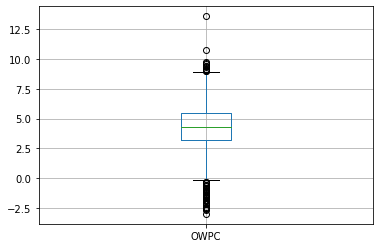

In [24]:
df_lipinski.boxplot(column=['OWPC'])

<AxesSubplot:>

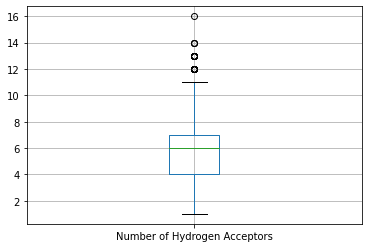

In [25]:
df_lipinski.boxplot(column=['Number of Hydrogen Acceptors'])

<AxesSubplot:>

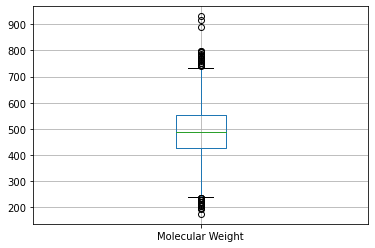

In [27]:
df_lipinski.boxplot(column=['Molecular Weight'])

<AxesSubplot:>

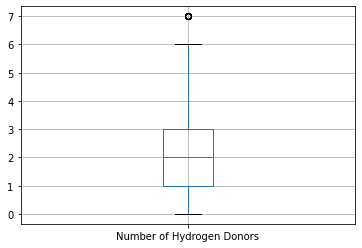

In [26]:
df_lipinski.boxplot(column=['Number of Hydrogen Donors'])

In [ ]:
#to find all the molecular discriptors

In [34]:
def mol_descriptors(molecules, verbose=False):
    
    molData = []
    for x in molecules:
        mol = Chem.MolFromSmiles(x)
        molData.append(mol)
        
    storage = np.arange(1,1)
    i=0
    
    for y in molData:
        CalcNumRotatableBonds = Chem.rdMolDescriptors.CalcNumRotatableBonds(y)
        CalcNumAliphaticHeterocycles= Chem.rdMolDescriptors.CalcNumAliphaticHeterocycles(y)
        CalcNumAliphaticRings = Chem.rdMolDescriptors.CalcNumAliphaticRings(y)
        CalcNumAmideBonds= Chem.rdMolDescriptors.CalcNumAmideBonds(y)
      
        
        
        insert = np.array([CalcNumRotatableBonds,CalcNumAliphaticHeterocycles,CalcNumAliphaticRings,CalcNumAmideBonds ])
        
        if (i==0):
            Molecular_Data = insert
        else:
            Molecular_Data = np.vstack([Molecular_Data, insert])
        i=+1
        
    column_names = ['CalcNumRotatableBonds', 'CalcNumAliphaticHeterocycles', ' CalcNumAliphaticRings', 'CalcNumAmideBonds']
    molecular_descriptors = pd.DataFrame(Molecular_Data,columns=column_names)

    return molecular_descriptors

In [35]:
df_molecular = mol_descriptors(df.Smiles)


In [36]:
df_molecular


,CalcNumRotatableBonds,CalcNumAliphaticHeterocycles,CalcNumAliphaticRings,CalcNumAmideBonds
0,5,1,1,0
1,8,0,2,2
2,7,0,1,1
3,10,0,2,1
4,8,0,2,2
5,2,0,0,0
6,5,0,0,2
7,4,0,0,2
8,7,0,1,1
9,7,0,1,1


In [37]:
!pip install pubchempy



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13834 sha256=95a6a6d10c9fb285767f8231e6700b2db7f77918d6fda33d4b2c2555431d5593
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\84\45\0e\b597debba098119b642eaf728ae1883d23ad8ea2a9366f2ded
Successfully built pubchempy


In [38]:
import pubchempy
smiles = 'COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCC1CCN(C)CC1'
compounds = pubchempy.get_compounds(smiles, namespace='smiles')
for c in compounds:
    print (c.iupac_name)

N-(4-bromo-2-fluorophenyl)-6-methoxy-7-[(1-methylpiperidin-4-yl)methoxy]quinazolin-4-amine


In [42]:
for i in df['Smiles']:
    print(i)

CC(C)CCn1c2ccc(cc2c(c(c1=O)C3=NS(=O)(=O)c4cc(ccc4N3)CC#N)O)F
c1cc(ccc1/C=C/C(=O)O)NC(=O)C2(CCC2)NC(=O)c3ccc4c(c3)nc(n4C5CCCCC5)c6ccoc6
c1ccnc(c1)c2nc3cc(ccc3n2C4CCCCC4)C(=O)N[C@@H](Cc5c[nH]c6c5cc(cc6)O)c7cscn7
c1cc2c(cc1C(=O)c3nc4cc(ccc4n3C5CCCCC5)C(=O)N[C@@H](Cc6c[nH]c7c6cc(cc7)O)C(=O)O)nc(n2C8CCCC8)c9ccoc9
c1ccnc(c1)c2nc3cc(ccc3n2C4CCCCC4)C(=O)NC5(CCCC5)C(=O)Nc6ccc(cc6)/C=C/C(=O)O
c1cscc1c2[nH]c(c(c(=O)n2)O)C(=O)O
c1ccc2cc(ccc2c1)S(=O)(=O)NC(=O)Nc3cscc3c4[nH]c(c(c(=O)n4)O)C(=O)O
CS(=O)(=O)NC(=O)Nc1cscc1c2[nH]c(c(c(=O)n2)O)C(=O)O
c1cc(sc1)c2nc3cc(ccc3n2C4CCCCC4)C(=O)N[C@@H](Cc5c[nH]c6c5cc(cc6)O)C(=O)O
c1cc(sc1)c2nc3cc(ccc3n2C4CCCCC4)C(=O)N[C@@H](Cc5c[nH]c6c5cc(cc6)O)c7cscn7
Cn1cccc1c2nc3cc(ccc3n2C4CCCCC4)C(=O)N[C@@H](Cc5c[nH]c6c5cc(cc6)O)C(=O)O
c1ccc(cc1)c2nc3cc(ccc3n2C4CCCCC4)C(=O)N[C@@H](Cc5c[nH]c6c5cc(cc6)O)C(=O)O
CC(C)(C)OC(=O)Nc1cscc1c2[nH]c(c(c(=O)n2)O)C(=O)O
c1ccc(cc1)COC(=O)Nc2cscc2c3[nH]c(c(c(=O)n3)O)C(=O)O
Cc1ccccc1S(=O)(=O)NC(=O)Nc2cscc2c3[nH]c(c(c(=O)n3)O)C(=O)O
c1cc(cc(c1

c1cc2c(cc1OCC(=O)N)S(=O)(=O)N=C(N2)c3c(c(nn(c3=O)CCC4CC4)c5ccsc5)O
Cc1ccc(s1)c2c(c(c(=O)n(n2)CCC3CC3)C4=NS(=O)(=O)c5cc(ccc5N4)OCC(=O)N)O
Cc1ccc(s1)c2c(c(c(=O)n(n2)CC3CCC3)C4=NS(=O)(=O)c5cc(ccc5N4)OCC(=O)N)O
CS(=O)(=O)Nc1ccc2c(c1)S(=O)(=O)N=C(N2)c3c(c4cccn4n(c3=O)Cc5ccc(c(c5)Cl)F)O
CC(C)CCn1c(=O)c(c(c2n1ccc2)O)C3=NS(=O)(=O)c4ccccc4N3
CS(=O)(=O)Nc1ccc2c(c1)S(=O)(=O)N=C(N2)c3c(c(nn(c3=O)Cc4ccsc4)c5cccs5)O
CC(C)CCn1c(=O)c(c(c(n1)c2cccs2)O)C3=NS(=O)(=O)c4cc(ccc4N3)S(=O)(=O)C
CS(=O)(=O)Nc1ccc2c(c1)S(=O)(=O)N=C(N2)c3c(c(nn(c3=O)Cc4ccc(cc4)F)c5cccs5)O
CC(C)CCn1c(=O)c(c(c(n1)c2cccs2)O)C3=NS(=O)(=O)c4cc(ccc4N3)C5CCCS5(=O)=O
CC(C)CCn1c(=O)c(c(c2n1ccc2)O)C3=NS(=O)(=O)c4cc(ccc4N3)N(C)S(=O)(=O)C
CN(c1ccc2c(c1)S(=O)(=O)N=C(N2)c3c(c4cccn4n(c3=O)Cc5ccc(cc5)F)O)S(=O)(=O)C
CC(C)CCn1c(=O)c(c(c(n1)c2cccs2)O)C3=NS(=O)(=O)c4cc(ccc4N3)CCC(=O)N
CC(C)Cn1c(=O)c(c(c(n1)c2cccs2)O)C3=NS(=O)(=O)c4cc(ccc4N3)NS(=O)(=O)C
CCC(C)n1c(=O)c(c(c(n1)c2cccs2)O)C3=NS(=O)(=O)c4cc(ccc4N3)NS(=O)(=O)C
C[C@@H]1C[C@@H](CN(C1)C(=O)c2c

CS(=O)(=O)Nc1ccc2c(c1)S(=O)(=O)N=C(N2)C3=C(C4(CCCC4)CN(C3=O)Cc5ccc(cc5)F)O
CS(=O)(=O)Nc1ccc2c(c1)S(=O)(=O)N=C(N2)C3=C(C[C@H](N(C3=O)Cc4ccc(cc4)F)c5ccc(cc5)F)O
CC[C@H]1CC(=C(C(=O)N1Cc2ccc(cc2)F)C3=NS(=O)(=O)c4cc(ccc4N3)NS(=O)(=O)C)O
CC(C)CC[C@@]1(CN(C(=O)C(=C1O)C2=NS(=O)(=O)c3cc(ccc3N2)NS(=O)(=O)C)C4CCC4)C
c1ccc2c(c1)c(c[nH]2)C[C@H](C(=O)O)NC(=O)c3cnn4c3ncc(c4C5CCCCC5)c6ccc(cc6)F
COCCc1c([nH]c2cc(nn2c1=O)C(=O)O)c3ccc(cc3)OCc4ccccc4
c1ccc(cc1)Oc2ccc(cc2)c3c(c(=O)n4c([nH]3)cc(n4)C(=O)O)C5CCCCC5
CS(=O)(=O)Nc1ccc2c(c1)S(=O)(=O)N=C(N2)C3=C(CC4(CCCC4)N(C3=O)Cc5ccc(cc5)F)O
COc1cccc(c1)Oc2ccc(cc2)c3c(c(=O)n4c([nH]3)cc(n4)C(=O)O)C5CCCCC5
CC(C)CC[C@@H]1CC(=C(C(=O)N1Cc2ccc(cc2)F)C3=NS(=O)(=O)c4cc(ccc4N3)NS(=O)(=O)C)O
c1cc(ccc1c2cnc3c(cnn3c2C4CCCCC4)C(=O)O)F
c1ccc(cc1)C[C@@H](C(=O)O)NC(=O)c2cnn3c2ncc(c3C4CCCCC4)c5ccc(cc5)F
CC(C)CC[C@@H]1CN(C(=O)C(=C1O)C2=NS(=O)(=O)c3cc(ccc3N2)NS(=O)(=O)C)C4CCCC4
CC(C)C[C@@H](C(=O)O)NC(=O)c1cnn2c1ncc(c2C3CCCCC3)c4ccc(cc4)F
c1ccc(cc1)CS(=O)(=O)NC(=O)c2cc3[nH]c(c(c(=O

In [1]:
#installing the library
!pip install padelpy

In [5]:
! wget --no-check-certificate https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip

    

--2022-02-09 10:51:25--  https://github.com/dataprofessor/padel/raw/main/fingerprints_xml.zip
Resolving github.com (github.com)... 13.234.210.38
Connecting to github.com (github.com)|13.234.210.38|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip [following]
--2022-02-09 10:51:25--  https://raw.githubusercontent.com/dataprofessor/padel/main/fingerprints_xml.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 10871 (11K) [application/zip]
Saving to: 'fingerprints_xml.zip'

     0K ..........                                            100%  141K=0.08s



In [9]:
from zipfile import ZipFile
file_name ='fingerprints_xml.zip'
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')


Extracting all the files now...
Done!


In [16]:
from padelpy import padeldescriptor

# to supply a configuration file
padeldescriptor(config=r'C:\Users\DELL\Desktop\Dissertation\Data\fingerprints_xml')

#
# a path to a directory containing structural files can be supplied
padeldescriptor(mol_dir=r'C:\Users\DELL\Desktop\Dissertation\Data\fingerprints_xml', d_file='descriptors.csv')

# to calculate 2-D and 3-D descriptors
padeldescriptor(d_2d=True, d_3d=True)

# to calculate PubChem fingerprints
padeldescriptor(fingerprints=True)

# to convert molecule into a 3-D structure
padeldescriptor(convert3d=True)


# to detect aromaticity
padeldescriptor(detectaromaticity=True)

# to calculate fingerprints
padeldescriptor(fingerprints=True)

# to save process status to a log file
padeldescriptor(log=True)

# to remove salts from the molecule(s)
padeldescriptor(removesalt=True)

# to retain 3-D coordinates when standardizing
padeldescriptor(retain3d=True)

# to retain order (output same order as input)
padeldescriptor(retainorder=True)

# to standardize nitro groups to N(:O):O
padeldescriptor(standardizenitro=True)

# to standardize tautomers
padeldescriptor(standardizetautomers=True)

# to specify a SMIRKS tautomers file
padeldescriptor(tautomerlist='\\path\\to\\tautomers\\')

# to use filenames as molecule names
padeldescriptor(usefilenameasmolname=True)

# to set the maximum number of compounds in a resulting descriptors file
padeldescriptor(maxcpdperfile=32)

# to set the maximum runtime (in mS) per molecule
padeldescriptor(maxruntime=10000)

# to set the maximum number of waiting jobs in the queue
padeldescriptor(waitingjobs=10)

# to set the maximum number of threads used
padeldescriptor(threads=2)

# to prevent padel-splash image from loading.
padeldescriptor(headless=True)


In [11]:
from padelpy import padeldescriptor

fingerprint = 'Substructure'

fingerprint_output_file = ''.join([fingerprint,'.csv']) #Substructure.csv
fingerprint_descriptortypes = fp[fingerprint]

padeldescriptor(mol_dir=r'C:\Users\DELL\Desktop\Dissertation\Data\structure.smi', 
                d_file=fingerprint_output_file, #'Substructure.csv'
                #descriptortypes='SubstructureFingerprint.xml', 
                descriptortypes= fingerprint_descriptortypes,
                detectaromaticity=True,
                standardizenitro=True,
                standardizetautomers=True,
                threads=2,
                removesalt=True,
                log=True,
                fingerprints=True)

NameError: name 'fp' is not defined

In [13]:
FP_list = ['AtomPairs2DCount',
 'AtomPairs2D',
 'EState',
 'CDKextended',
 'CDK',
 'CDKgraphonly',
 'KlekotaRothCount',
 'KlekotaRoth',
 'MACCS',
 'PubChem',
 'SubstructureCount',
 'Substructure']

In [14]:
fp = dict(zip(FP_list, xml_files))
fp

NameError: name 'xml_files' is not defined